- Mohammed Abdullah Ebrahim 202106206
- Yahya Zaqad 202110652
- Saeed Al Ansari 202209377
- Ghanim Masoud 202004603

Saving all the requirments :

In [39]:
!pip freeze > requirements.txt

###  Random Seeds
- Python random seed: 42
- NumPy seed: 42
- TensorFlow seed: 42

These ensure consistent model training and evaluation.

###  Hyperparameters (Best Configuration)
- Vocabulary Size: 10,000
- Sequence Length (Padding): 256
- Embedding Dimension: 16 (fixed)
- Dense Units: 32
- Optimizer: Adam
- Batch Size: 256
- Epochs: up to 20
- Early Stopping Patience: 3

###  Dependencies

Required Python packages are listed in `requirements.txt`:


- numpy
- tensorflow==2.18.0
- scikit-learn
- matplotlib
- pandas

### Hardware used
- Processor: Apple M1 (MacBook Air)
- RAM: 8 GB
- Environment: Google Colab (with T4 GPU) / Jupyter Notebook on local MacBook Air
- GPU: Google Colab (T4 GPU)

 IMDB Sentiment Analysis Project

Data prep, model training, evaluation, comparison, visualization

 -------------------------
 1. IMPORT LIBRARIES
 -------------------------

In [52]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

 -------------------------
 2. REPRODUCIBILITY
 -------------------------

In [25]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)


 -------------------------
 3. LOAD DATA
 -------------------------

In [ ]:
# Load data
VOCAB_SIZE = 10000  # here we chose the most requent words (10000)
MAXLEN = 256  # so we padd the reviews less than 256 and truncate those more than 256

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE)#no tokenization needed already tokenized

train_data = pad_sequences(train_data, maxlen=MAXLEN)
test_data = pad_sequences(test_data, maxlen=MAXLEN)

# 0.8 of size for training, 0.2 for testing
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

 -------------------------
 4. BUILD MODEL
 -------------------------

In [27]:
# Model builder
def create_model(embed_dim=16, dense_units=16, optimizer='adam'):
    model = models.Sequential([
        layers.Embedding(VOCAB_SIZE, embed_dim, input_length=MAXLEN),
        layers.GlobalAveragePooling1D(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=2)

# Hyperparameter search space
dense_units_list = [16, 32]
optimizer_list = ['adam', 'rmsprop']
batch_size_list = [256, 512]

best_accuracy = 0
best_params = {}
results_table = []

# Grid search done manually because the function was giving a lot of error
for dense_units in dense_units_list:
    for optimizer in optimizer_list:
        for batch_size in batch_size_list:
            print(f"\nTraining model with dense_units={dense_units}, optimizer={optimizer}, batch_size={batch_size}")
            model = create_model(dense_units=dense_units, optimizer=optimizer)
            history = model.fit(
                train_data,
                train_labels,
                epochs=20,
                batch_size=batch_size,
                validation_data=(val_data, val_labels),
                callbacks=[early_stopping],
                verbose=2
            )
            best_val_acc = max(history.history['val_accuracy'])
            print(f"Best Validation Accuracy in this run: {best_val_acc:.4f}")
            results_table.append({
                'dense_units': dense_units,
                'optimizer': optimizer,
                'batch_size': batch_size,
                'val_accuracy': best_val_acc
            })
            if best_val_acc > best_accuracy:
                best_accuracy = best_val_acc
                best_params = {
                    'dense_units': dense_units,
                    'optimizer': optimizer,
                    'batch_size': batch_size
                }




Training model with dense_units=16, optimizer=adam, batch_size=256
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 - 3s - 38ms/step - accuracy: 0.5987 - loss: 0.6860 - val_accuracy: 0.6920 - val_loss: 0.6683
Epoch 2/20
79/79 - 0s - 5ms/step - accuracy: 0.7524 - loss: 0.6264 - val_accuracy: 0.7968 - val_loss: 0.5746
Epoch 3/20
79/79 - 1s - 7ms/step - accuracy: 0.8200 - loss: 0.5126 - val_accuracy: 0.8408 - val_loss: 0.4622
Epoch 4/20
79/79 - 0s - 4ms/step - accuracy: 0.8525 - loss: 0.4122 - val_accuracy: 0.8524 - val_loss: 0.3880
Epoch 5/20
79/79 - 0s - 4ms/step - accuracy: 0.8723 - loss: 0.3493 - val_accuracy: 0.8642 - val_loss: 0.3468
Epoch 6/20
79/79 - 0s - 4ms/step - accuracy: 0.8863 - loss: 0.3091 - val_accuracy: 0.8734 - val_loss: 0.3214
Epoch 7/20
79/79 - 0s - 4ms/step - accuracy: 0.8967 - loss: 0.2808 - val_accuracy: 0.8792 - val_loss: 0.3049
Epoch 8/20
79/79 - 0s - 4ms/step - accuracy: 0.9050 - loss: 0.2591 - val_accuracy: 0.8836 - val_loss: 0.2938
Epoch 9/20
79/79 - 1s - 7ms/step - accuracy: 0.9122 - loss: 0.2413 - val_accuracy: 0.8842 - val_loss: 0.2861
Epoch 10/20
79/79 - 0s - 5ms/

Results:

In [29]:
# Print best result
print(f"\nBest Validation Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {best_params}")

# Summary table of grid Search
df_results = pd.DataFrame(results_table)
print("\nGrid Search Results (sorted):")
print(df_results.sort_values(by='val_accuracy', ascending=False))


Best Validation Accuracy: 0.8884
Best Parameters: {'dense_units': 16, 'optimizer': 'adam', 'batch_size': 256}

Grid Search Results (sorted):
   dense_units optimizer  batch_size  val_accuracy
0           16      adam         256        0.8884
5           32      adam         512        0.8882
1           16      adam         512        0.8868
4           32      adam         256        0.8842
6           32   rmsprop         256        0.8166
2           16   rmsprop         256        0.7886
3           16   rmsprop         512        0.7762
7           32   rmsprop         512        0.7660


  -------------------------
  5. Evaluate Best Model
  -------------------------

In [41]:
# Train final model
best_model = create_model(
    dense_units=best_params['dense_units'],
    optimizer=best_params['optimizer']
)
final_history = best_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=best_params['batch_size'],
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)
best_model.save('best_model.keras')
print("Best model saved to best_model.keras")
print(f"Best model saved to {best_model_path}")
# Evaluate on test set
test_loss, test_acc = best_model.evaluate(test_data, test_labels, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predictions and evaluation
predictions = (best_model.predict(test_data) > 0.5).astype('int32')
print("\nClassification Report:")
print(classification_report(test_labels, predictions))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5609 - loss: 0.6905 - val_accuracy: 0.6447 - val_loss: 0.6735
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7209 - loss: 0.6572 - val_accuracy: 0.7140 - val_loss: 0.6108
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7799 - loss: 0.5770 - val_accuracy: 0.7977 - val_loss: 0.5136
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8285 - loss: 0.4760 - val_accuracy: 0.8273 - val_loss: 0.4369
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8528 - loss: 0.3981 - val_accuracy: 0.8470 - val_loss: 0.3870
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8753 - loss: 0.3455 - val_accuracy: 0.8553 - val_loss: 0.3581
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8866 - loss: 0.3097 - val_accuracy: 0.8595 - val_loss: 0.3401
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8953 - loss: 0.2829 - val_accuracy: 0.8645 - val_loss: 0.3271
Ep

Some Examples of using the model to classify reviews:

In [ ]:
#testing the model on real input:
def review_to_sequence(review, word_index, maxlen=256):
    review = review.lower().split()
    encoded = [word_index.get(word, 2) + 3 for word in review if word in word_index]
    return pad_sequences([encoded], maxlen=maxlen)


word_index = imdb.get_word_index()

# Example 1
custom_review1 = "This movie was really amazing and I loved the acting!"
input_seq1 = review_to_sequence(custom_review1, word_index)
prediction1 = best_model.predict(input_seq1)[0][0]
print(f"\nReview 1: {custom_review1}")
print(f"Predicted Sentiment: {'Positive' if prediction1 > 0.5 else 'Negative'} (Confidence: {prediction1:.2f})")

# Example 2
custom_review2 = "The plot was boring and I fell asleep halfway through."
input_seq2 = review_to_sequence(custom_review2, word_index)
prediction2 = best_model.predict(input_seq2)[0][0]
print(f"\nReview 2: {custom_review2}")
print(f"Predicted Sentiment: {'Positive' if prediction2 > 0.5 else 'Negative'} (Confidence: {prediction2:.2f})")

# Example 3
custom_review3 = "It had some good moments, but overall it was disappointing."
input_seq3 = review_to_sequence(custom_review3, word_index)
prediction3 = best_model.predict(input_seq3)[0][0]
print(f"\nReview 3: {custom_review3}")
print(f"Predicted Sentiment: {'Positive' if prediction3 > 0.5 else 'Negative'} (Confidence: {prediction3:.2f})")

# Example 4
custom_review4 = "Absolutely fantastic! Best film I’ve seen in a while, Amazing"
input_seq4 = review_to_sequence(custom_review4, word_index)
prediction4 = best_model.predict(input_seq4)[0][0]
print(f"\nReview 4: {custom_review4}")
print(f"Predicted Sentiment: {'Positive' if prediction4 > 0.5 else 'Negative'} (Confidence: {prediction4:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step

Review 1: This movie was really amazing and I loved the acting!
Predicted Sentiment: Positive (Confidence: 0.71)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Review 2: The plot was boring and I fell asleep halfway through.
Predicted Sentiment: Negative (Confidence: 0.09)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Review 3: It had some good moments, but overall it was disappointing.
Predicted Sentiment: Positive (Confidence: 0.53)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Review 4: Absolutely fantastic! Best film I’ve seen in a while, Amazing
Predicted Sentiment: Positive (Confidence: 0.71)


 -------------------------
 6. CONFUSION MATRIX
 -------------------------

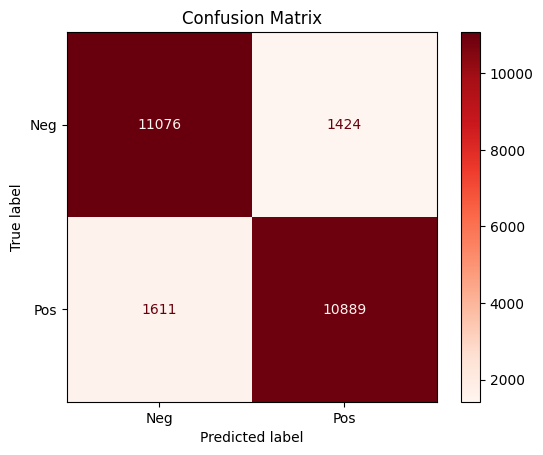

In [62]:
cm = confusion_matrix(test_labels, predictions)
ConfusionMatrixDisplay(cm, display_labels=['Neg', 'Pos']).plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

  -------------------------
  7. VISUALIZATION
  -------------------------

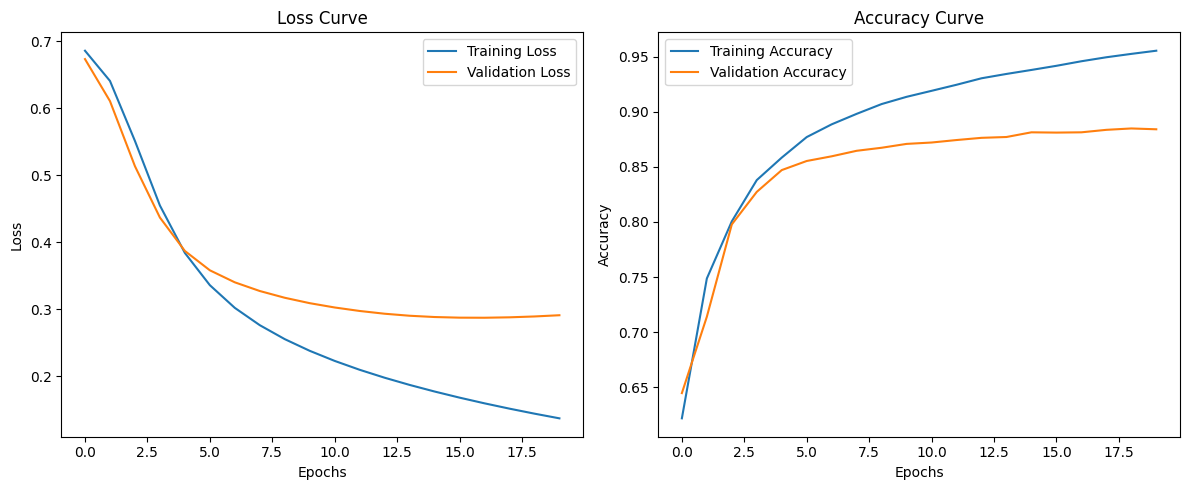

In [63]:
# Plot loss and accuracy curves
history = final_history.history
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

  -------------------------
  8. BASELINE COMPARISON
  -------------------------

In [64]:
# Decode reviews for logistic regression
word_index = imdb.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_index.items())

def decode_review(encoded):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded])

raw_train = [decode_review(x) for x in train_data[:5000]]
raw_labels = train_labels[:5000]
raw_test = [decode_review(x) for x in test_data[:1000]]
raw_test_labels = test_labels[:1000]

# Vectorize and train logistic regression
vec = CountVectorizer(max_features=10000)
X_train_vec = vec.fit_transform(raw_train)
X_test_vec = vec.transform(raw_test)

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_vec, raw_labels)
log_preds = logreg.predict(X_test_vec)

print("\nLogistic Regression Report:")
print(classification_report(raw_test_labels, log_preds))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       526
           1       0.83      0.85      0.84       474

    accuracy                           0.84      1000
   macro avg       0.84      0.85      0.84      1000
weighted avg       0.85      0.84      0.85      1000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  -------------------------
  9. Exploring other models
  -------------------------

Naive Bayes :

In [48]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, raw_labels)

# Make predictions
nb_preds = naive_bayes.predict(X_test_vec)

# Print classification report
print("\nNaive Bayes Report:")
print(classification_report(raw_test_labels, nb_preds))



Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       526
           1       0.84      0.81      0.82       474

    accuracy                           0.84      1000
   macro avg       0.84      0.83      0.84      1000
weighted avg       0.84      0.84      0.84      1000



Decision Tree :

In [57]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_vec, raw_labels)
dtree_preds = dtree.predict(X_test_vec)
dtree_accuracy = accuracy_score(raw_test_labels, dtree_preds)

print("\nDecision Tree  Report:")
print(classification_report(raw_test_labels, dtree_preds))


Decision Tree  Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       526
           1       0.69      0.73      0.71       474

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



Comparing the accuracy using the Chart:

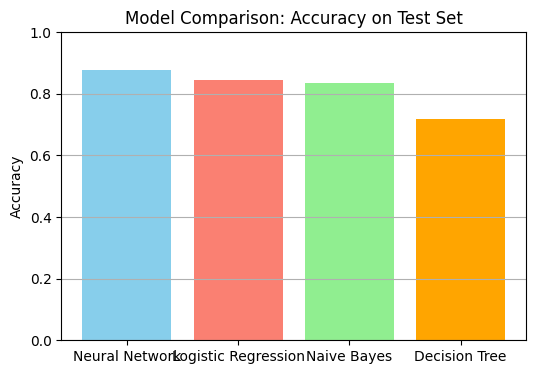

In [65]:

nn_accuracy = test_acc
logreg_accuracy = logreg.score(X_test_vec, raw_test_labels)
nb_accuracy = naive_bayes.score(X_test_vec, raw_test_labels)


plt.figure(figsize=(6, 4))
plt.bar(['Neural Network', 'Logistic Regression', 'Naive Bayes', 'Decision Tree'],
        [nn_accuracy, logreg_accuracy, nb_accuracy, dtree_accuracy],
        color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Model Comparison: Accuracy on Test Set')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


 -------------------------
 10. SUMMARY
 -------------------------


In [60]:
print(f"""
  Summary of Results
-----------------------
  Best Neural Network Configuration:
   • Dense Units   : {best_params['dense_units']}
   • Optimizer     : {best_params['optimizer']}
   • Batch Size    : {best_params['batch_size']}

  Performance:
   • Test Accuracy (Neural Network)     : {test_acc * 100:.2f}%
   • Test Accuracy (Logistic Regression): {logreg_accuracy * 100:.2f}%
   • Test Accuracy (Naive Bayes)        : {nb_accuracy * 100:.2f}%
   • Test Accuracy (Decision Tree)      : {dtree_accuracy * 100:.2f}%

  Insights:
   • The tuned neural network achieved a performance gain of {(test_acc - logreg_accuracy) * 100:.1f}% over the logistic regression baseline.
   • The decision tree and Naive Bayes also performed reasonably well.
   • Deep learning offers superior handling of word embeddings and nonlinear patterns in sentiment classification.
""")



  Summary of Results
-----------------------
  Best Neural Network Configuration:
   • Dense Units   : 16
   • Optimizer     : adam
   • Batch Size    : 256

  Performance:
   • Test Accuracy (Neural Network)     : 87.86%
   • Test Accuracy (Logistic Regression): 84.50%
   • Test Accuracy (Naive Bayes)        : 83.60%
   • Test Accuracy (Decision Tree)      : 71.90%

  Insights:
   • The tuned neural network achieved a performance gain of 3.4% over the logistic regression baseline.
   • The decision tree and Naive Bayes also performed reasonably well.
   • Deep learning offers superior handling of word embeddings and nonlinear patterns in sentiment classification.

